In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
import cv2
import seaborn as sns
from keras.utils import to_categorical
from keras.preprocessing import image
# from tqdm import tqdm


In [11]:
df = pd.read_csv("/content/drive/MyDrive/orig/data.csv", sep=";")

In [12]:
df

,ID,GENDER,AGE,I1,I2,C,PM1,PM2,M1,M2,38,18,28,48
0,28309,1,23.04,idt28309_utl3_I1_1_23.04_H.jpg,idt28309_utl3_I2_1_23.04_H.jpg,idt28309_utl3_C1_1_23.04_H.jpg,idt28309_utl3_PM1_1_23.04_H.jpg,idt28309_utl3_PM2_1_23.04_H.jpg,idt28309_utl3_M1_1_23.04_H.jpg,idt28309_utl3_M2_1_23.04_H.jpg,idt28309_utl3_38_1_23.04_H.jpg,idt28309_utl3_18_1_23.04_H.jpg,idt28309_utl3_28_1_23.04_H.jpg,idt28309_utl3_48_1_23.04_H.jpg
1,28308,2,23.97,idt28308_utl3_I1_2_23.97_H.jpg,idt28308_utl3_I2_2_23.97_H.jpg,idt28308_utl3_C1_2_23.97_H.jpg,idt28308_utl3_PM1_2_23.97_H.jpg,idt28308_utl3_PM2_2_23.97_H.jpg,idt28308_utl3_M1_2_23.97_H.jpg,idt28308_utl3_M2_2_23.97_H.jpg,idt28308_utl3_38_2_23.97_H.jpg,idt28308_utl3_18_2_23.97_H.jpg,idt28308_utl3_28_2_23.97_G.jpg,idt28308_utl3_48_2_23.97_H.jpg
2,28307,2,22.29,idt28307_utl3_I1_2_22.29_H.jpg,idt28307_utl3_I2_2_22.29_H.jpg,idt28307_utl3_C1_2_22.29_H.jpg,idt28307_utl3_PM1_2_22.29_H.jpg,idt28307_utl3_PM2_2_22.29_H.jpg,idt28307_utl3_M1_2_22.29_H.jpg,idt28307_utl3_M2_2_22.29_H.jpg,NaN,idt28307_utl3_18_2_22.29_H.jpg,NaN,NaN
3,28306,2,23.18,idt28306_utl3_I1_2_23.18_H.jpg,idt28306_utl3_I2_2_23.18_H.jpg,idt28306_utl3_C1_2_23.18_H.jpg,idt28306_utl3_PM1_2_23.18_H.jpg,idt28306_utl3_PM2_2_23.18_H.jpg,idt28306_utl3_M1_2_23.18_H.jpg,idt28306_utl3_M2_2_23.18_H.jpg,idt28306_utl3_38_2_23.18_H.jpg,idt28306_utl3_18_2_23.18_H.jpg,idt28306_utl3_28_2_23.18_H.jpg,idt28306_utl3_48_2_23.18_H.jpg
4,28305,2,22.34,idt28305_utl3_I1_2_22.34_H.jpg,idt28305_utl3_I2_2_22.34_H.jpg,idt28305_utl3_C1_2_22.34_H.jpg,idt28305_utl3_PM1_2_22.34_H.jpg,idt28305_utl3_PM2_2_22.34_H.jpg,idt28305_utl3_M1_2_22.34_H.jpg,idt28305_utl3_M2_2_22.34_H.jpg,idt28305_utl3_38_2_22.34_H.jpg,idt28305_utl3_18_2_22.34_H.jpg,idt28305_utl3_28_2_22.34_H.jpg,idt28305_utl3_48_2_22.34_H.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,5,2,10.35,idt5_utl3_I1_2_10.35_H.jpg,idt5_utl3_I2_2_10.35_H.jpg,idt5_utl3_C1_2_10.35_F.jpg,idt5_utl3_PM1_2_10.35_F.jpg,idt5_utl3_PM2_2_10.35_E.jpg,idt5_utl3_M1_2_10.35_G.jpg,idt5_utl3_M2_2_10.35_E.jpg,NaN,NaN,NaN,NaN
3323,4,2,9.86,idt4_utl3_I1_2_9.86_H.jpg,idt4_utl3_I2_2_9.86_H.jpg,idt4_utl3_C1_2_9.86_F.jpg,idt4_utl3_PM1_2_9.86_F.jpg,idt4_utl3_PM2_2_9.86_E.jpg,idt4_utl3_M1_2_9.86_H.jpg,idt4_utl3_M2_2_9.86_E.jpg,NaN,NaN,NaN,NaN
3324,3,2,9.04,idt3_utl3_I1_2_9.04_H.jpg,idt3_utl3_I2_2_9.04_H.jpg,idt3_utl3_C1_2_9.04_F.jpg,idt3_utl3_PM1_2_9.04_E.jpg,idt3_utl3_PM2_2_9.04_E.jpg,idt3_utl3_M1_2_9.04_G.jpg,idt3_utl3_M2_2_9.04_D.jpg,NaN,NaN,NaN,NaN
3325,2,2,8.26,idt2_utl3_I1_2_8.26_G.jpg,idt2_utl3_I2_2_8.26_G.jpg,idt2_utl3_C1_2_8.26_E.jpg,idt2_utl3_PM1_2_8.26_E.jpg,idt2_utl3_PM2_2_8.26_D.jpg,idt2_utl3_M1_2_8.26_G.jpg,idt2_utl3_M2_2_8.26_D.jpg,NaN,NaN,NaN,NaN


In [13]:
df1 = df.fillna(0)
df1


,ID,GENDER,AGE,I1,I2,C,PM1,PM2,M1,M2,38,18,28,48
0,28309,1,23.04,idt28309_utl3_I1_1_23.04_H.jpg,idt28309_utl3_I2_1_23.04_H.jpg,idt28309_utl3_C1_1_23.04_H.jpg,idt28309_utl3_PM1_1_23.04_H.jpg,idt28309_utl3_PM2_1_23.04_H.jpg,idt28309_utl3_M1_1_23.04_H.jpg,idt28309_utl3_M2_1_23.04_H.jpg,idt28309_utl3_38_1_23.04_H.jpg,idt28309_utl3_18_1_23.04_H.jpg,idt28309_utl3_28_1_23.04_H.jpg,idt28309_utl3_48_1_23.04_H.jpg
1,28308,2,23.97,idt28308_utl3_I1_2_23.97_H.jpg,idt28308_utl3_I2_2_23.97_H.jpg,idt28308_utl3_C1_2_23.97_H.jpg,idt28308_utl3_PM1_2_23.97_H.jpg,idt28308_utl3_PM2_2_23.97_H.jpg,idt28308_utl3_M1_2_23.97_H.jpg,idt28308_utl3_M2_2_23.97_H.jpg,idt28308_utl3_38_2_23.97_H.jpg,idt28308_utl3_18_2_23.97_H.jpg,idt28308_utl3_28_2_23.97_G.jpg,idt28308_utl3_48_2_23.97_H.jpg
2,28307,2,22.29,idt28307_utl3_I1_2_22.29_H.jpg,idt28307_utl3_I2_2_22.29_H.jpg,idt28307_utl3_C1_2_22.29_H.jpg,idt28307_utl3_PM1_2_22.29_H.jpg,idt28307_utl3_PM2_2_22.29_H.jpg,idt28307_utl3_M1_2_22.29_H.jpg,idt28307_utl3_M2_2_22.29_H.jpg,0,idt28307_utl3_18_2_22.29_H.jpg,0,0
3,28306,2,23.18,idt28306_utl3_I1_2_23.18_H.jpg,idt28306_utl3_I2_2_23.18_H.jpg,idt28306_utl3_C1_2_23.18_H.jpg,idt28306_utl3_PM1_2_23.18_H.jpg,idt28306_utl3_PM2_2_23.18_H.jpg,idt28306_utl3_M1_2_23.18_H.jpg,idt28306_utl3_M2_2_23.18_H.jpg,idt28306_utl3_38_2_23.18_H.jpg,idt28306_utl3_18_2_23.18_H.jpg,idt28306_utl3_28_2_23.18_H.jpg,idt28306_utl3_48_2_23.18_H.jpg
4,28305,2,22.34,idt28305_utl3_I1_2_22.34_H.jpg,idt28305_utl3_I2_2_22.34_H.jpg,idt28305_utl3_C1_2_22.34_H.jpg,idt28305_utl3_PM1_2_22.34_H.jpg,idt28305_utl3_PM2_2_22.34_H.jpg,idt28305_utl3_M1_2_22.34_H.jpg,idt28305_utl3_M2_2_22.34_H.jpg,idt28305_utl3_38_2_22.34_H.jpg,idt28305_utl3_18_2_22.34_H.jpg,idt28305_utl3_28_2_22.34_H.jpg,idt28305_utl3_48_2_22.34_H.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,5,2,10.35,idt5_utl3_I1_2_10.35_H.jpg,idt5_utl3_I2_2_10.35_H.jpg,idt5_utl3_C1_2_10.35_F.jpg,idt5_utl3_PM1_2_10.35_F.jpg,idt5_utl3_PM2_2_10.35_E.jpg,idt5_utl3_M1_2_10.35_G.jpg,idt5_utl3_M2_2_10.35_E.jpg,0,0,0,0
3323,4,2,9.86,idt4_utl3_I1_2_9.86_H.jpg,idt4_utl3_I2_2_9.86_H.jpg,idt4_utl3_C1_2_9.86_F.jpg,idt4_utl3_PM1_2_9.86_F.jpg,idt4_utl3_PM2_2_9.86_E.jpg,idt4_utl3_M1_2_9.86_H.jpg,idt4_utl3_M2_2_9.86_E.jpg,0,0,0,0
3324,3,2,9.04,idt3_utl3_I1_2_9.04_H.jpg,idt3_utl3_I2_2_9.04_H.jpg,idt3_utl3_C1_2_9.04_F.jpg,idt3_utl3_PM1_2_9.04_E.jpg,idt3_utl3_PM2_2_9.04_E.jpg,idt3_utl3_M1_2_9.04_G.jpg,idt3_utl3_M2_2_9.04_D.jpg,0,0,0,0
3325,2,2,8.26,idt2_utl3_I1_2_8.26_G.jpg,idt2_utl3_I2_2_8.26_G.jpg,idt2_utl3_C1_2_8.26_E.jpg,idt2_utl3_PM1_2_8.26_E.jpg,idt2_utl3_PM2_2_8.26_D.jpg,idt2_utl3_M1_2_8.26_G.jpg,idt2_utl3_M2_2_8.26_D.jpg,0,0,0,0


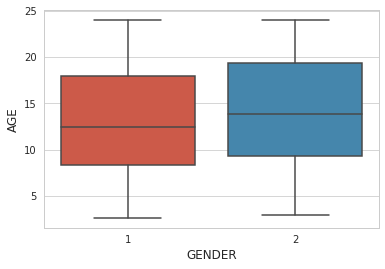

In [14]:
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'GENDER', y = 'AGE', data = df1) 

In [17]:
age = df1['AGE']
PM1 = df1[['PM1']]

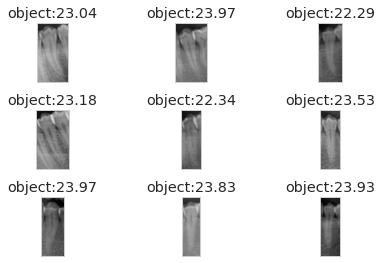

In [18]:
items = df1[['PM1', 'AGE']].head(9)
for i,row in items.iterrows():
  img_name = row['PM1']
  data_dir = '/content/drive/MyDrive/orig/PM1'
  image_path = os.path.join(data_dir, img_name)
  image = plt.imread(image_path, format=None)
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(image, cmap='gray', interpolation='bicubic')
  plt.title('object:{}'.format(row['AGE']))
  plt.xticks([])
  plt.yticks([])

In [19]:
data = PM1.to_records(index=True)
print(data)

[(   0, 'idt28309_utl3_PM1_1_23.04_H.jpg')
 (   1, 'idt28308_utl3_PM1_2_23.97_H.jpg')
 (   2, 'idt28307_utl3_PM1_2_22.29_H.jpg') ...
 (3324, 'idt3_utl3_PM1_2_9.04_E.jpg') (3325, 'idt2_utl3_PM1_2_8.26_E.jpg')
 (3326, 'idt1_utl3_PM1_2_4.58_C.jpg')]


In [20]:
for i,n in enumerate(data):
  try:
    img_name = n[1]
    data_dir = '/content/drive/MyDrive/orig/PM1'
    image_path = os.path.join(data_dir, img_name)
    image = plt.imread(image_path, format=None)
    temp = list(n)
    temp[1] = image
    data[i] = tuple(temp)
  except: 
    pass

print(data)


[(   0, array([[[ 46,  46,  46],
        [ 45,  45,  45],
        [ 45,  45,  45],
        ...,
        [ 60,  60,  60],
        [ 60,  60,  60],
        [ 60,  60,  60]],

       [[ 44,  44,  44],
        [ 44,  44,  44],
        [ 44,  44,  44],
        ...,
        [ 65,  65,  65],
        [ 65,  65,  65],
        [ 65,  65,  65]],

       [[ 42,  42,  42],
        [ 42,  42,  42],
        [ 42,  42,  42],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 63,  63,  63]],

       ...,

       [[135, 135, 135],
        [134, 134, 134],
        [135, 135, 135],
        ...,
        [ 72,  72,  72],
        [ 71,  71,  71],
        [ 70,  70,  70]],

       [[143, 143, 143],
        [138, 138, 138],
        [136, 136, 136],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68]],

       [[146, 146, 146],
        [138, 138, 138],
        [133, 133, 133],
        ...,
        [ 64,  64,  64],
        [ 65,  65,  65],
        [ 66,  6

In [23]:
train_data = tuple(data)
train_data = data
train_data






rec.array([(   0, array([[[ 46,  46,  46],
        [ 45,  45,  45],
        [ 45,  45,  45],
        ...,
        [ 60,  60,  60],
        [ 60,  60,  60],
        [ 60,  60,  60]],

       [[ 44,  44,  44],
        [ 44,  44,  44],
        [ 44,  44,  44],
        ...,
        [ 65,  65,  65],
        [ 65,  65,  65],
        [ 65,  65,  65]],

       [[ 42,  42,  42],
        [ 42,  42,  42],
        [ 42,  42,  42],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 63,  63,  63]],

       ...,

       [[135, 135, 135],
        [134, 134, 134],
        [135, 135, 135],
        ...,
        [ 72,  72,  72],
        [ 71,  71,  71],
        [ 70,  70,  70]],

       [[143, 143, 143],
        [138, 138, 138],
        [136, 136, 136],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68]],

       [[146, 146, 146],
        [138, 138, 138],
        [133, 133, 133],
        ...,
        [ 64,  64,  64],
        [ 65,  65,  65],
      

In [24]:
# import numpy as geek 
   
# in_arr = geek.array(train_data)
# rec_arr = in_arr.view(geek.recarray) 
# out_arr = rec_arr.tolist() 
# out_arr

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
(X_train, X_test, y_train, y_test) = train_test_split(train_data, age,
	 test_size=0.2, random_state=42)



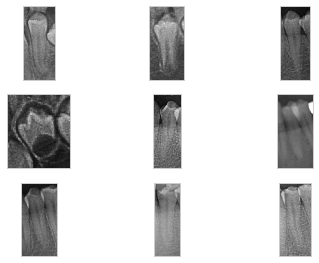

In [27]:

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3, i+1)
  plt.tight_layout()
  plt.imshow(X_train[i][1], cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

In [28]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))
print(X_train[1])



(2661,)
(2661,)
(666,)
(666,)
(2957, array([[[142, 142, 142],
        [139, 139, 139],
        [133, 133, 133],
        ...,
        [105, 105, 105],
        [102, 102, 102],
        [ 98,  98,  98]],

       [[146, 146, 146],
        [142, 142, 142],
        [136, 136, 136],
        ...,
        [107, 107, 107],
        [106, 106, 106],
        [103, 103, 103]],

       [[143, 143, 143],
        [139, 139, 139],
        [135, 135, 135],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [108, 108, 108]],

       ...,

       [[ 65,  65,  65],
        [ 69,  69,  69],
        [ 72,  72,  72],
        ...,
        [ 62,  62,  62],
        [ 62,  62,  62],
        [ 63,  63,  63]],

       [[ 56,  56,  56],
        [ 61,  61,  61],
        [ 65,  65,  65],
        ...,
        [ 64,  64,  64],
        [ 65,  65,  65],
        [ 66,  66,  66]],

       [[ 65,  65,  65],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [ 63,  63,  63],
        [ 64

In [29]:
X_train = np.array(X_train)
# X_train = X_train.reshape(2661,1)
# X_train = X_train.reshape(-1,1)
# X_train = np.asarray(X_train)
# X_train = X_train.astype('float32')
print(X_train.dtype)

X_test = np.array(X_test)
print(X_test.dtype)
# X_test = X_test.reshape(666,1)
# X_test = X_test.reshape(-1,1)
# X_test = np.asarray(X_test)
print(X_train[0])


(numpy.record, [('index', '<i8'), ('PM1', 'O')])
(numpy.record, [('index', '<i8'), ('PM1', 'O')])
(3124, array([[[110, 110, 110],
        [111, 111, 111],
        [111, 111, 111],
        ...,
        [ 69,  69,  69],
        [ 67,  67,  67],
        [ 62,  62,  62]],

       [[ 99,  99,  99],
        [101, 101, 101],
        [104, 104, 104],
        ...,
        [ 64,  64,  64],
        [ 63,  63,  63],
        [ 59,  59,  59]],

       [[ 90,  90,  90],
        [ 94,  94,  94],
        [ 99,  99,  99],
        ...,
        [ 59,  59,  59],
        [ 60,  60,  60],
        [ 58,  58,  58]],

       ...,

       [[106, 106, 106],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [110, 110, 110],
        [114, 114, 114],
        [114, 114, 114]],

       [[105, 105, 105],
        [100, 100, 100],
        [ 97,  97,  97],
        ...,
        [107, 107, 107],
        [114, 114, 114],
        [117, 117, 117]],

       [[101, 101, 101],
        [ 97,  97,  97],
       

In [30]:
y_train = np.array(y_train)


In [31]:
print(y_train)
print(y_train.shape)

[14.51  9.61 23.89 ...  4.48  4.48 16.92]
(2661,)


In [32]:
# from sklearn.neural_network import MLPClassifier
# import numpy
# mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=16)
# mlp.fit(X_train, y_train)
# y_predict_mlp = mlp.predict(X_test)

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

adam = Adam(lr=1e-5)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 1539      
Total params: 3,673,091
Trainable params: 3,673,091
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(X_train, y_train,
                    batch_size=128, epochs=25,
                    verbose=1, validation_data=(X_test, y_test))

ValueError: ignored